Uvozimo knjiznice in podatke.

In [ ]:
from csv import DictReader
%matplotlib inline
%config InlineBackend.figu_formats = ['jpg']
import matplotlib
matplotlib.figu.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

df_students = pd.read_csv("students_final.csv")
df_subjects = pd.read_csv("subjects_3.csv")
subjectName =  df_subjects.groupby(['subject_id']).apply(lambda x: x['subject_name'].to_string(index=False)).to_dict()






C:\Users\nejc\AppData\Local\Temp\ipykernel_1692\2400116139.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  subjectName =  df_subjects.groupby(['subject_id']).apply(lambda x: x['subject_name'].to_string(index=False)).to_dict()


Prestejemo za vse predmete koliko vpisnih je bilo na njih in nato predstavimo z bar grafom

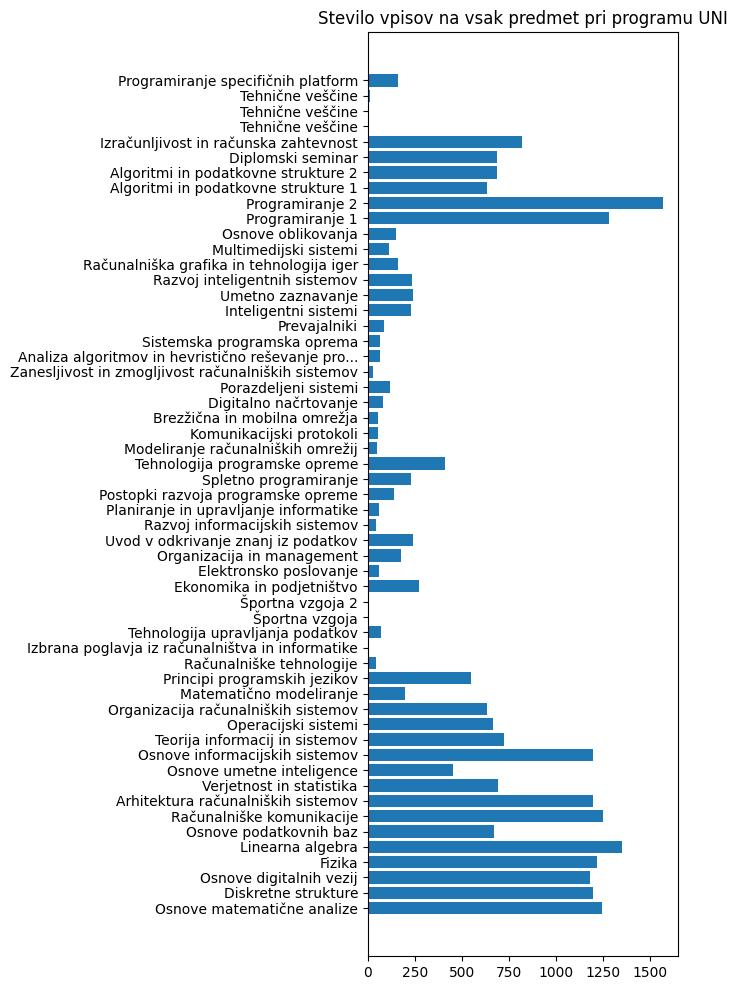

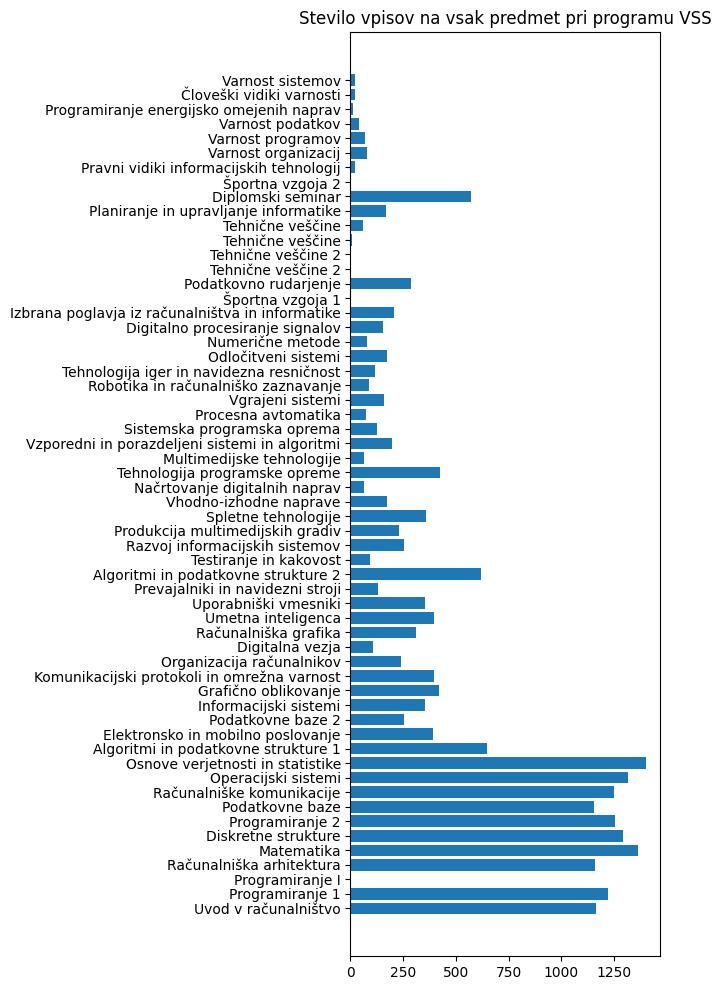

In [ ]:
subjectNameVSS = dict()
subjectCountVSS = dict()
subjectNameUNI = dict()
subjectCountUNI = dict()

#inicializiramo slovarje za hranjenje imen ter hranjenje stevila vpisov
for el in subjectName:
    if el[:3] == "632":
        subjectNameUNI[el]=subjectName[el]
        subjectCountUNI[el]=0
    elif el[:3] == "637":
        subjectNameVSS[el]=subjectName[el]
        subjectCountVSS[el]=0

#parsamo cez tabelo studentov in pregledamo vse predmete ki jih imajo ter nato pristejemo korektnim slovarjem
for index, row in df_students.drop(columns=['student_id']).iterrows():
    for el in row:
        if isinstance(el,str):
            predmeti = el[1:-1].split(',')
            for predmet in predmeti:
                predmet = predmet.replace("\'","")
                predmet = predmet.replace(" ","")
                if subjectNameVSS.get(predmet):
                    subjectCountVSS[predmet]+=1
                if subjectNameUNI.get(predmet):
                    subjectCountUNI[predmet]+=1

#izpisemo vse s pomcojo dveh horizontalnih bargrafov. Ne se jih takoj navelicat ker teh je kar nekaj
plt.figure(figsize=(4, 12))
plt.title('Stevilo vpisov na vsak predmet pri programu UNI')
plt.barh(range(len(subjectCountUNI)), list(subjectCountUNI.values()), align='center')
plt.yticks(range(len(subjectCountUNI)), list(subjectNameUNI.values()))
plt.show()
plt.figure(figsize=(4, 12))
plt.title('Stevilo vpisov na vsak predmet pri programu VSS')
plt.barh(range(len(subjectCountVSS)), list(subjectCountVSS.values()), align='center')
plt.yticks(range(len(subjectCountVSS)), list(subjectNameVSS.values()))
plt.show()


Pri presjsnih grafih opazimo da nekaj predmetov ali nima opisov ali pa jih ima tako malo da se sploh ne opazi tako da v tem odseku 
filtriramo vse podatke in odstranimo tiste ki imajo manj kot 10 vpisov

63701
63702
63703
63704
63705
63706
63707
63708
63709
63710
63711
63723


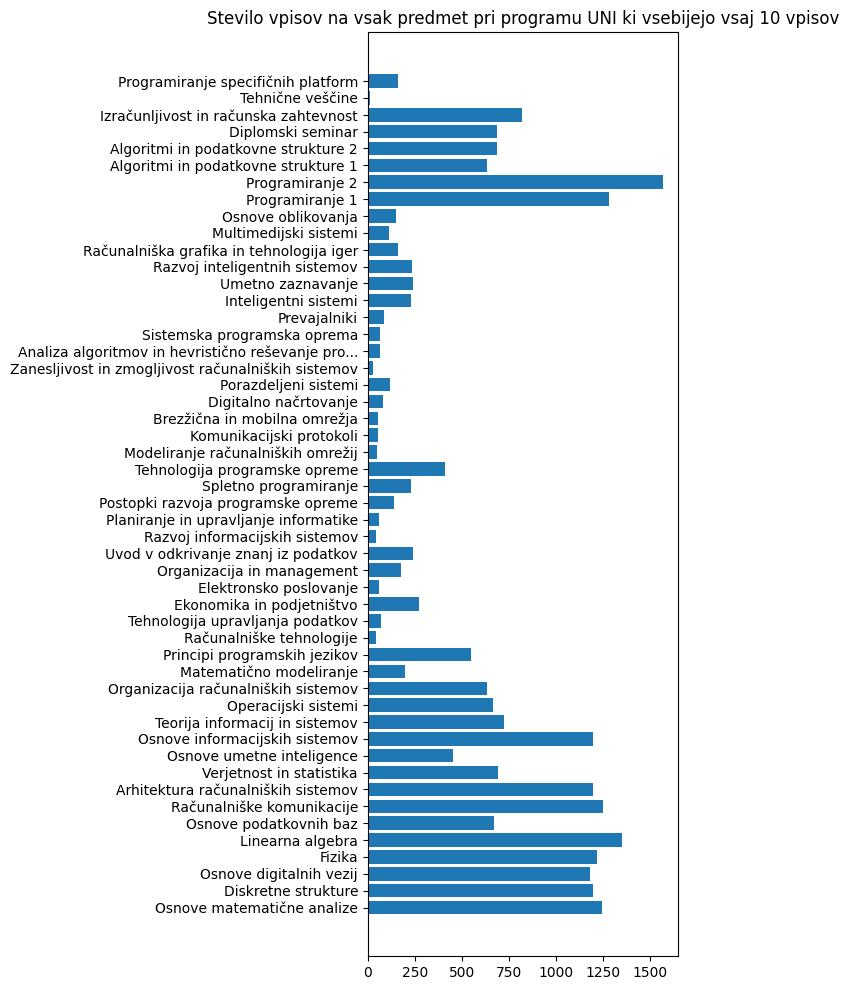

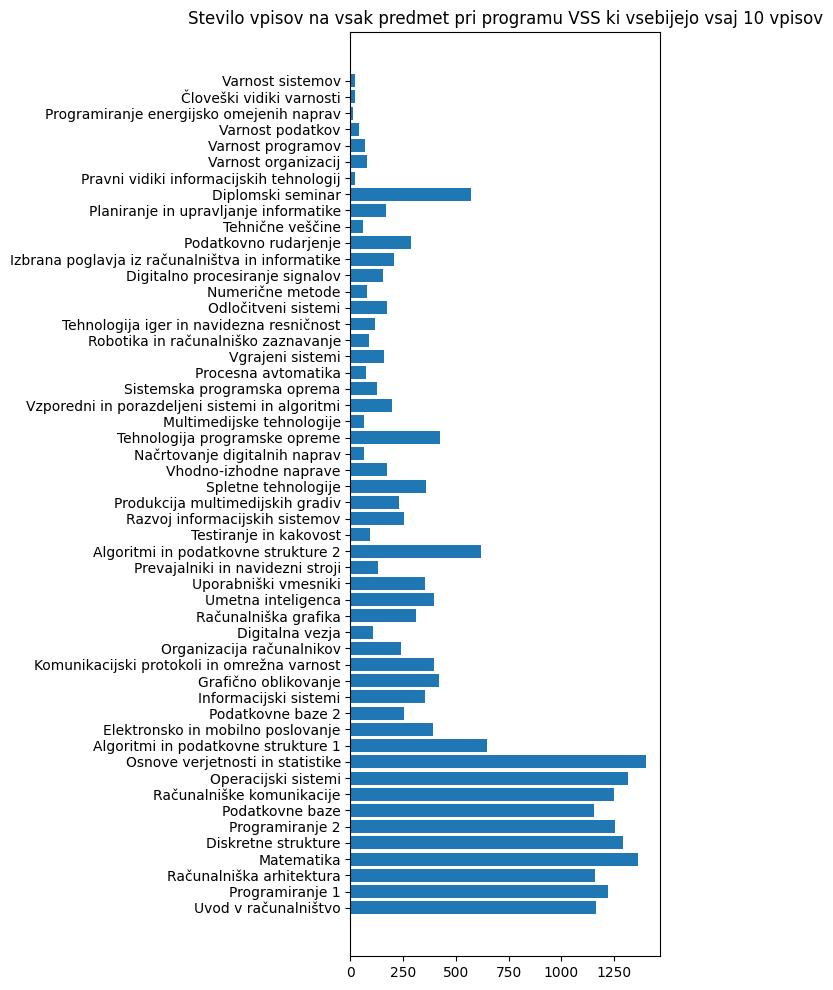

In [43]:
subjectFilterNameVSS = dict()
subjectFilterCountVSS = dict()
subjectFilterNameUNI = dict()
subjectFilterCountUNI = dict()

#gremo cez oba slovarja ter enostavno odstanimo tiste ki imajo manj kot 10 vpisov
for el in subjectName:
    if el[:3] == "637" and subjectCountVSS[el]>=10:
        subjectFilterNameVSS[el]=subjectName[el]
        subjectFilterCountVSS[el]=subjectCountVSS[el]
    elif el[:3] == "632" and subjectCountUNI[el]>=10:
        subjectFilterNameUNI[el]=subjectName[el]
        subjectFilterCountUNI[el]=subjectCountUNI[el]
for el in subjectCountVSS:
    if subjectCountVSS[el]>600:
        print(el)

#glej zgoraj
plt.figure(figsize=(4, 12))
plt.title('Stevilo vpisov na vsak predmet pri programu UNI ki vsebijejo vsaj 10 vpisov')
plt.barh(range(len(subjectFilterCountUNI)), list(subjectFilterCountUNI.values()), align='center')
plt.yticks(range(len(subjectFilterCountUNI)), list(subjectFilterNameUNI.values()))
plt.show()
plt.figure(figsize=(4, 12))
plt.title('Stevilo vpisov na vsak predmet pri programu VSS ki vsebijejo vsaj 10 vpisov')
plt.barh(range(len(subjectFilterCountVSS)), list(subjectFilterCountVSS.values()), align='center')
plt.yticks(range(len(subjectFilterCountVSS)), list(subjectFilterNameVSS.values()))
plt.show()

Zdaj izpisimo kolikon studentov se je prijavilo v 1. letnik. Enostavno spet parsamo cez tabelo in za vsako vpisno preverimo kdaj se pojavijo prvi predmeti, nato se preverimo sifro nakljucnega predmeta na podlagi katere izvemo ali
je iz programa UNI ali VSS

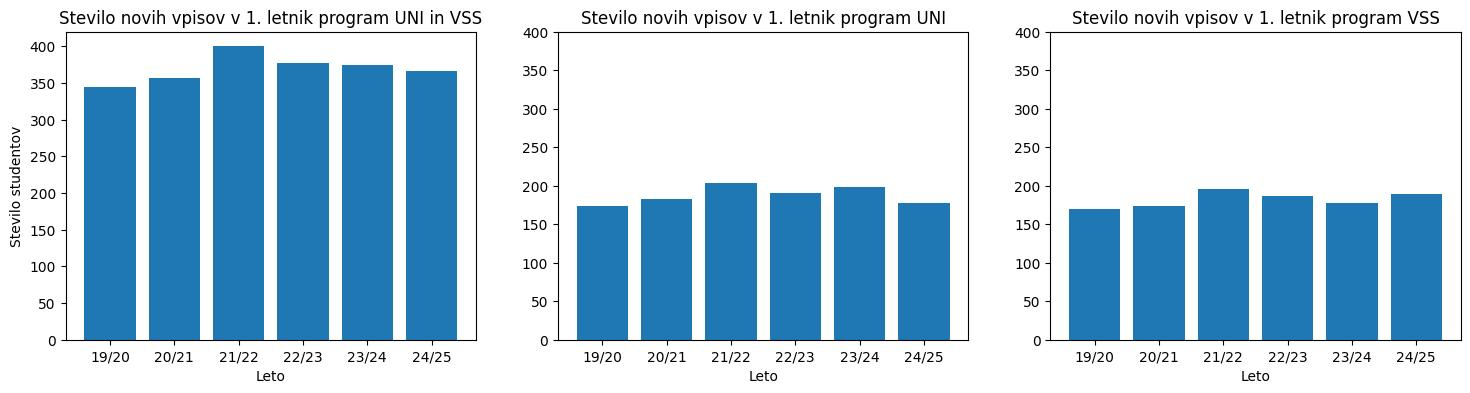

In [ ]:
#podobno kot prej ustvarimo in inizializiramo slovarje
studentCount = dict()
studentCountVSS = dict()
studentCountUNI = dict()
for i in range(19,25):
    studentCount[str(i)+"/"+str(i+1)]=0
    studentCountVSS[str(i)+"/"+str(i+1)]=0
    studentCountUNI[str(i)+"/"+str(i+1)]=0

#pregledamo vse studente in izvemo kdaj se jim pojavijo prvi predmeti, alternativno bi lahko izvedeli preko vpisne ampak je se zmeraj treba pregledati predmete
#saj le tako izvemo kateri program so
for index, row in df_students.drop(columns=['student_id']).iterrows():
    for i in range(19,25):
        if row[str(i)+"/"+str(i+1)+"_1"] !="[]":
            prg = ""
            if not isinstance(row[str(i)+"/"+str(i+1)+"_1"],float):
                prg = row[str(i)+"/"+str(i+1)+"_1"][2:5]
            if prg=="637" or prg=="632":
                studentCount[str(i)+"/"+str(i+1)]+=1
                if prg=="637":
                    studentCountVSS[str(i)+"/"+str(i+1)]+=1
                else :
                    studentCountUNI[str(i)+"/"+str(i+1)]+=1
            break


plt.figure(figsize=(18, 4))
plt.subplot(1,3,1)
plt.title("Stevilo novih vpisov v 1. letnik program UNI in VSS")
plt.xlabel("Leto")
plt.ylabel("Stevilo studentov")
plt.bar(studentCount.keys(), studentCount.values())
plt.subplot(1,3,2)
ax = plt.gca()
ax.set_ylim([0, 400])
plt.title("Stevilo novih vpisov v 1. letnik program UNI")
plt.xlabel("Leto")
plt.bar(studentCountUNI.keys(), studentCountUNI.values())
plt.subplot(1,3,3)
ax = plt.gca()
ax.set_ylim([0, 400])
plt.title("Stevilo novih vpisov v 1. letnik program VSS")
plt.xlabel("Leto")
plt.bar(studentCountVSS.keys(), studentCountVSS.values())
plt.show()


Naslednja stvar je pogled ponavljalcev. Prva sekcija je kateri predmeti se nasplosno najbol ponavljajo.

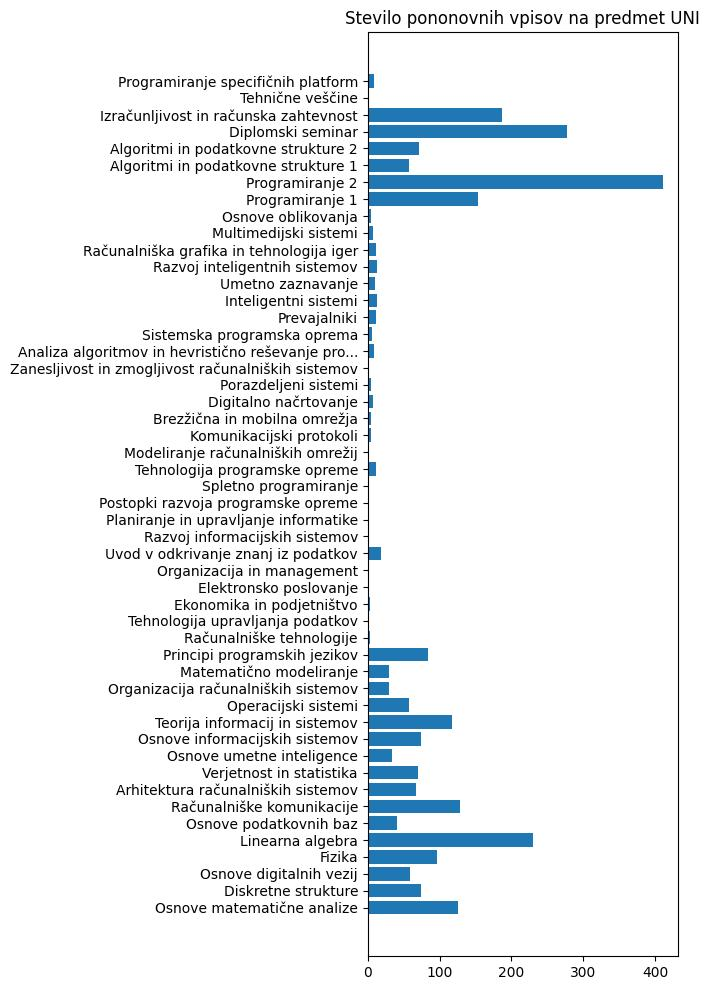

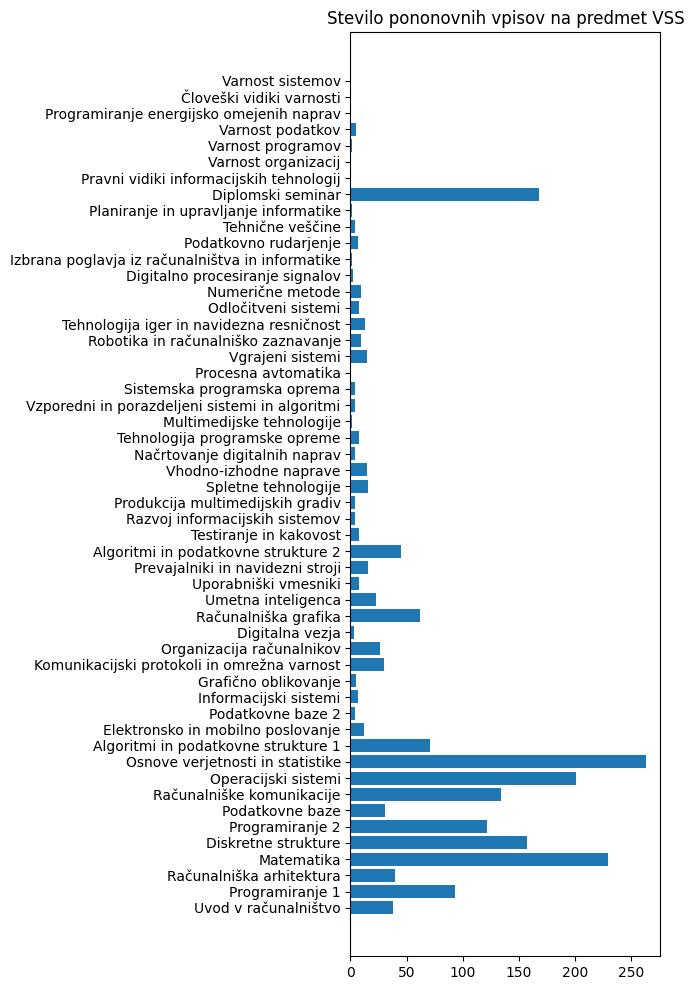

In [ ]:
subjectNameVSS = dict()
subjectPonVSS = dict()
subjectNameUNI = dict()
subjectPonUNI = dict()


for el in subjectName:
    if el[:3] == "632" and subjectCountUNI[el]>=10:
        subjectNameUNI[el]=subjectName[el]
        subjectPonUNI[el]=0
    elif el[:3] == "637" and subjectCountVSS[el]>=10:
        subjectNameVSS[el]=subjectName[el]
        subjectPonVSS[el]=0


#enako kot prej gremo cez studente samo da tokrat hranimo od vsakega studenta zgodovino predmetov
#v primeru da naletimo na predmet ki ga student ze ima v zgodovini, vemo da predmet ponavlja
for index, row in df_students.drop(columns=['student_id']).iterrows():
    predmethist=set()
    for el in row:
        if isinstance(el,str):
            predmeti = el[1:-1].split(',')
            for predmet in predmeti:
                predmet = predmet.replace("\'","")
                predmet = predmet.replace(" ","")
                if predmet in predmethist:
                    #tukaj uporabimo filtrirane predmete iz prejsnega grafa saj podatki ki imajo manj kot 10 vpisov nebi veliko pomenili
                    if subjectFilterNameVSS.get(predmet):
                        subjectPonVSS[predmet]+=1
                    if subjectFilterNameUNI.get(predmet):
                        subjectPonUNI[predmet]+=1
                else:
                    predmethist.add(predmet)
            
plt.figure(figsize=(4, 12))
plt.title('Stevilo ponovnih vpisov na predmet UNI')
plt.barh(range(len(subjectPonUNI)), list(subjectPonUNI.values()), align='center')
plt.yticks(range(len(subjectPonUNI)), list(subjectNameUNI.values()))
plt.show()
plt.figure(figsize=(4, 12))
plt.title('Stevilo ponovnih vpisov na predmet VSS')
plt.barh(range(len(subjectPonVSS)), list(subjectPonVSS.values()), align='center')
plt.yticks(range(len(subjectPonVSS)), list(subjectNameVSS.values()))
plt.show()


Iz teh grafov vidimo da najvec pojavitev pri UNI ima Programiranje 2 pri VSS pa OVS ampak to ne pomeni da se te predmeti najvec ponavljajo saj ker sta to
obvezna predmeta imata tudi veliko vec vpisov kot izbrini. Zato v naslednjem odseku delimo te vrednosti z celotnimi vpisi na predmet da izvemo delez. 

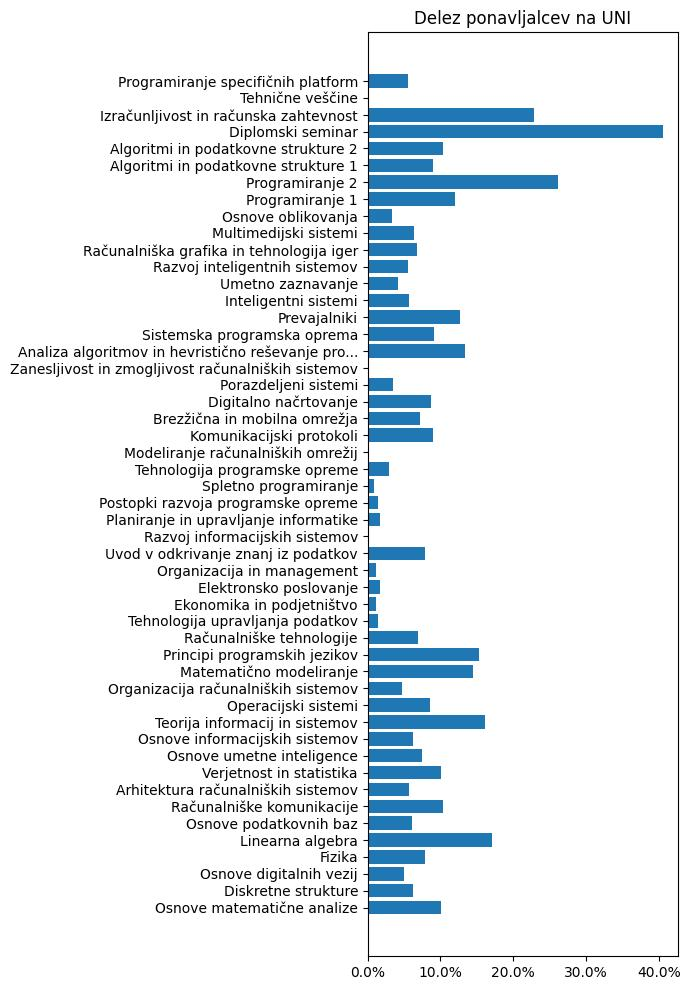

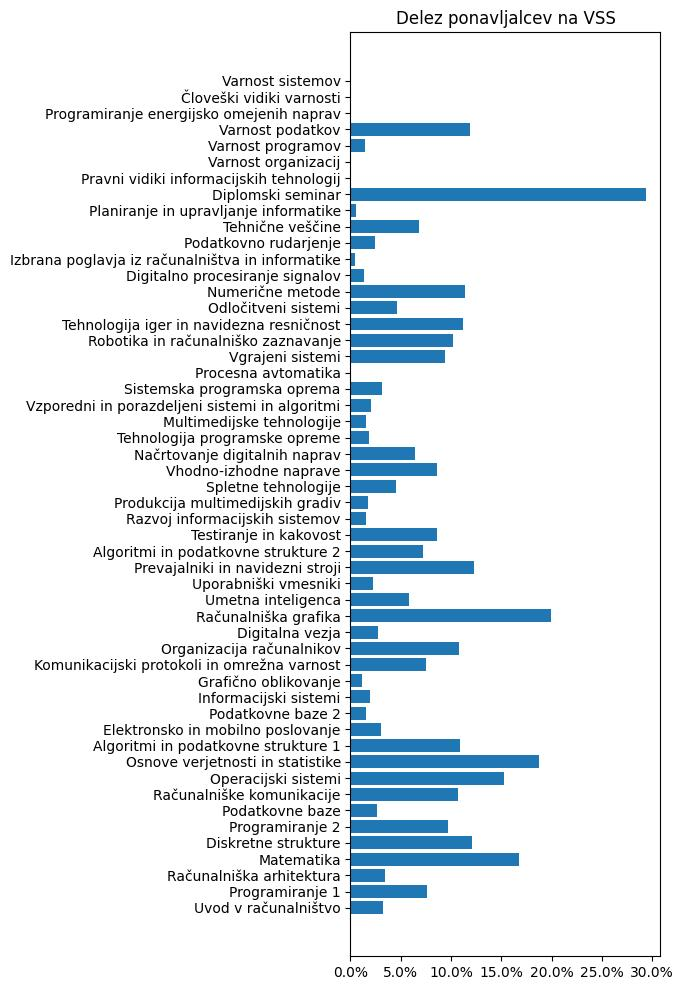

In [42]:
subjectDistUNI = dict()
subjectDistVSS = dict()

#delimo stevilo ponovitev s celotnim stevilom vpisov
for subject in subjectNameUNI:
    subjectDistUNI[subject]=subjectPonUNI[subject]/max(1,subjectCountUNI[subject])*100
for subject in subjectNameVSS:
    subjectDistVSS[subject]=subjectPonVSS[subject]/max(1,subjectCountVSS[subject])*100

plt.figure(figsize=(4, 12))
plt.title('Delez ponavljalcev na UNI')
plt.barh(range(len(subjectDistUNI)), list(subjectDistUNI.values()), align='center')
plt.yticks(range(len(subjectDistUNI)), list(subjectNameUNI.values()))
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()
plt.figure(figsize=(4, 12))
plt.title('Delez ponavljalcev na VSS')
plt.barh(range(len(subjectDistVSS)), list(subjectDistVSS.values()), align='center')
plt.yticks(range(len(subjectDistVSS)), list(subjectNameVSS.values()))
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()


Kot vidimo je da pri UNI in VSS najvecji delez drzi diplomski seminar, kar je logicno saj vecino ljudi opravlja diplomo opravlja 2 leti
ampak bolj zanimivo je da da pri VSS ima Racunalniska grafika vecji delez kot pa OVS
Dajmo zdaj pogledat kaksen je delez ljudi ki ponavlja OVS skozi leta

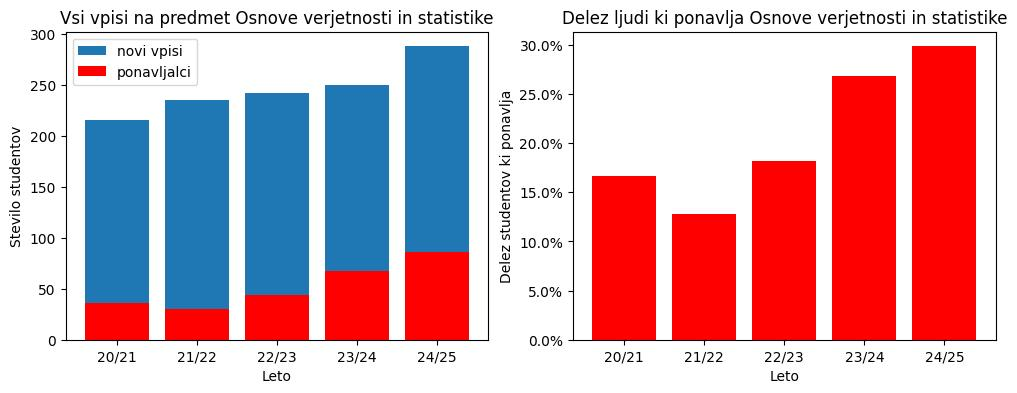

In [ ]:
SubjectCode = "63710"
PonHist = dict()
TotalVpis = dict()
Delez = dict()

for i in range(19,25):
    PonHist[str(i)+"/"+str(i+1)]=0
    TotalVpis[str(i)+"/"+str(i+1)]=0

#ne izmumljam kolesa na novo parsanje dokaj podobno prejsnim
for index, row in df_students.drop(columns=['student_id']).iterrows():
    predmethist=set()
    for i in range(19,25):
        for j in range(1,3):
            if not isinstance(row[str(i)+"/"+str(i+1)+"_"+str(j)],float):
                predmeti = row[str(i)+"/"+str(i+1)+"_"+str(j)][1:-1].split(',')
                for predmet in predmeti:
                    predmet = predmet.replace("\'","")
                    predmet = predmet.replace(" ","")
                    if predmet==SubjectCode:
                        if predmet in predmethist:
                            PonHist[str(i)+"/"+str(i+1)]+=1
                        
                        TotalVpis[str(i)+"/"+str(i+1)]+=1

                    predmethist.add(predmet)

#izbrisemo podatke za leto 2019/2020 saj ceprav vemo stevilo vpisov v 1. letnik ne moremo izvedeti podatkov za ponavljanje
del PonHist["19/20"]
del TotalVpis["19/20"]

#priravimo se dealez ponavljalcev za leto
for el in PonHist:
    Delez[el]=PonHist[el]/TotalVpis[el]*100


plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.title("Vsi vpisi na predmet "+subjectName[SubjectCode])
plt.xlabel("Leto")
plt.ylabel("Stevilo studentov")
plt.bar(TotalVpis.keys(), TotalVpis.values(), label="novi vpisi")
plt.bar(PonHist.keys(), PonHist.values(), bottom=0, color='red',label="ponavljalci")
plt.legend(loc="upper left")
plt.subplot(1,2,2)
plt.title("Delez ljudi ki ponavlja "+subjectName[SubjectCode])
plt.xlabel("Leto")
plt.ylabel("Delez studentov ki ponavlja")
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.bar(Delez.keys(), Delez.values(),color="red")
plt.show()
